In [2]:
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
model = tf.keras.models.load_model('face_mask_model.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        36928     
__________

Tensor("Const_25:0", shape=(1, 300, 300, 3), dtype=uint8)


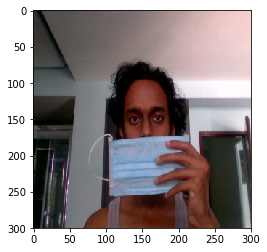

In [37]:
cap = cv2.VideoCapture(0)
ret, frame = cap.read()
im_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
resized = cv2.resize(im_rgb, (300,300))
image_np=np.expand_dims(resized,axis=0)
image_tensor=tf.convert_to_tensor(image_np)
print(image_tensor)
plt.imshow(resized)

cap.release()

In [38]:
pred = model.predict(image_tensor, steps=1)
print(pred)

[[0.]]


Tensor("Const_20:0", shape=(1, 300, 300, 3), dtype=float64)
[[0.99984884]]


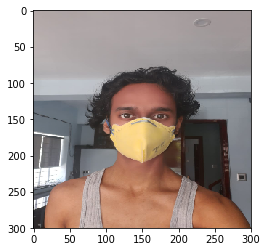

In [27]:
img = cv2.imread('data/mask.jpeg')
im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resized = cv2.resize(im_rgb, (300,300))
resized = resized/255
#print(resized)
image_np=np.expand_dims(resized,axis=0)
image_tensor=tf.convert_to_tensor(image_np)
print(image_tensor)
plt.imshow(resized)
pred = model.predict(image_tensor, steps=1)
print(pred)

In [40]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [49]:
def detect_face(img):
    face_img = img.copy()
    im_rgb = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)
    resized = cv2.resize(im_rgb, (300,300))
    image_np=np.expand_dims(resized,axis=0)
    image_tensor=tf.convert_to_tensor(image_np)
    pred = model.predict(image_tensor, steps=1)
    #print(pred)
    face_rectangle = face_cascade.detectMultiScale(face_img)
    
    for (x,y,w,h) in face_rectangle:
        if(pred>0.5):
            cv2.rectangle(face_img, (x,y), (x+w,y+h), (0,0,255), 5)
        else:
            cv2.rectangle(face_img, (x,y), (x+w,y+h), (0,255,0), 5)
        
    return face_img

In [53]:
cap = cv2.VideoCapture(0)

while True:
    
    ret, frame = cap.read()
    
    frame = detect_face(frame)
    
    cv2.imshow('Face Detection Video', frame)
        
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()